# Telco Customer Churn Analysis

## Project Goal
The goal of this project is to analyze customer data from a telecom company
and build a model to predict customer churn (whether a customer leaves the service).

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('Telco-Customer-Churn.csv')

In [3]:
pd.set_option('display.max_columns', None)
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
data['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

## Initial Observations

- The dataset contains customer demographic, service, and billing information.
- The target variable is **Churn**, which indicates whether a customer left the service.
- There are both numerical and categorical features that will require preprocessing.
- The target variable appears imbalanced, with more non-churning customers than churning customers.

## Data Inspection and Cleaning

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
data['TotalCharges'] = pd.to_numeric(
    data['TotalCharges'], errors = 'coerce')

In [10]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [11]:
data['TotalCharges'] = data['TotalCharges'].fillna(0)

In [12]:
numeric_cols = data.select_dtypes(include = ['int64', 'float64']).columns
categorical_cols = data.select_dtypes(include = ['object']).columns

numeric_cols, categorical_cols

(Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object'),
 Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
        'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
        'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
        'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
       dtype='object'))

In [13]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


## Data Cleaning Summary

- Inspected data types and identified non-numeric columns.
- Converted 'TotalCharges' from string to numeric format.
- Revealed hidden missing values created during conversion.
- Filled missing 'TotalCharges' values with 0 to represent new customers who have not yet been billed.
- Identified numeric and categorical features for future preprocessing.

## Exploratory Data Analysis (EDA)

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

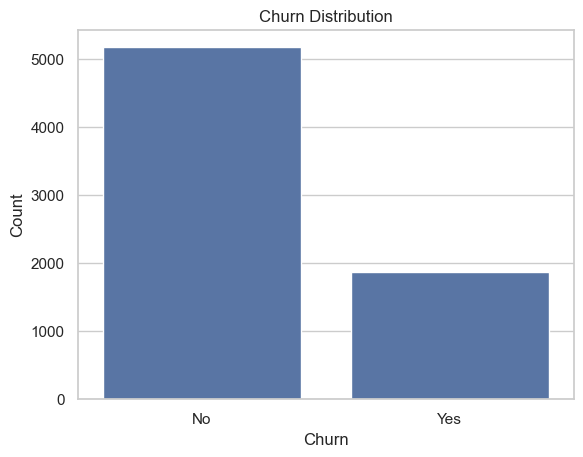

In [15]:
sns.countplot(x='Churn', data=data)
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

### Churn Distribution
The dataset is imbalanced, with more customers staying than leaving.

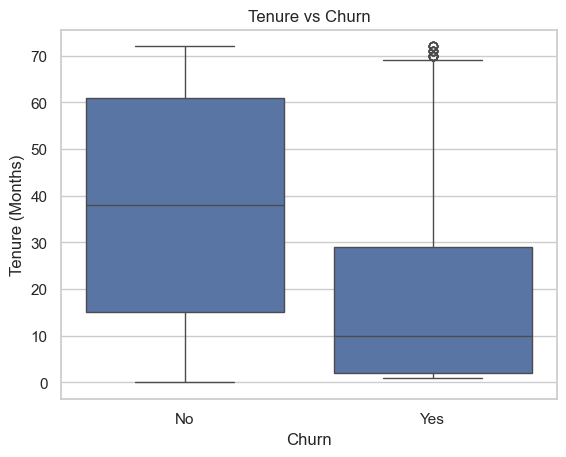

In [16]:
sns.boxplot(x='Churn', y='tenure', data=data)
plt.title('Tenure vs Churn')
plt.xlabel('Churn')
plt.ylabel('Tenure (Months)')
plt.show()

### Churn vs Tenure
Customers who churn generally have lower tenure, suggesting newer customers are more likely to leave.

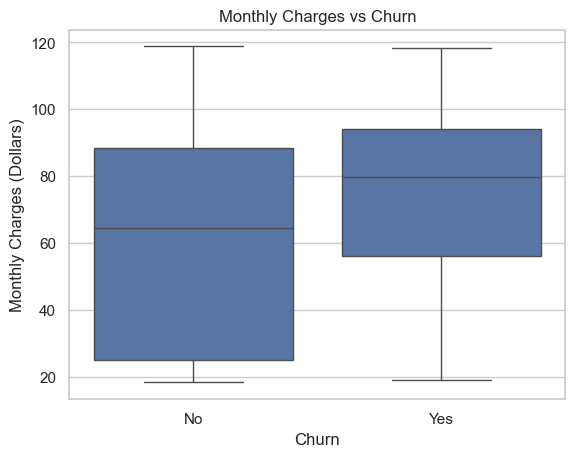

In [17]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=data)
plt.title('Monthly Charges vs Churn')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges (Dollars)')
plt.show()

### Churn vs Monthly Charges
Customers who churn tend to have higher monthly charges, suggesting pricing may affect retention.

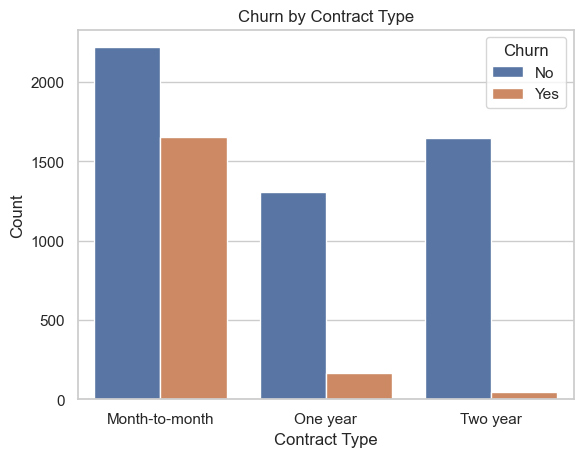

In [18]:
sns.countplot(x='Contract', hue='Churn', data=data)
plt.title('Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.show()

### Churn vs Contract Type
Month-to-month customers churn much more than customers on one-year or two-year contracts. 

In [19]:
(data
    .groupby('Contract')['Churn']
    .value_counts(normalize=True)
    .mul(100)
    .round(1)
)

Contract        Churn
Month-to-month  No       57.3
                Yes      42.7
One year        No       88.7
                Yes      11.3
Two year        No       97.2
                Yes       2.8
Name: proportion, dtype: float64

#### Contract Type - Churn Rates (Normalized)
The normalized churn rates confirm that month-to-month customers churn at a much higher rate than customers on longer-term contracts.

## EDA Summary
- Churned customers tend to have much lower tenure than non-churned customers.
- Higher monthy charges are associated with increased churn.
- Month-to-month contracts have significantly higher churn than long-term contracts.
- These patterns suggest that contract length and pricing are key drivers of churn.

## Service-Level Churn Analysis

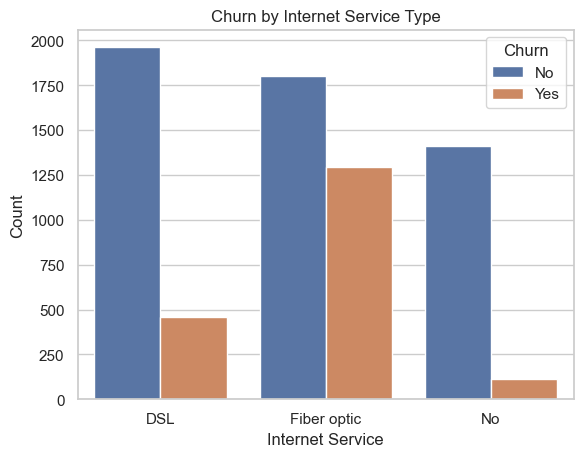

In [20]:
sns.countplot(x='InternetService', hue='Churn', data=data)
plt.title('Churn by Internet Service Type')
plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.show()

### Churn vs Internet Service

Customers using fiber optic internet appear to churn at higher rates compared to customers using DSL or no internet service.

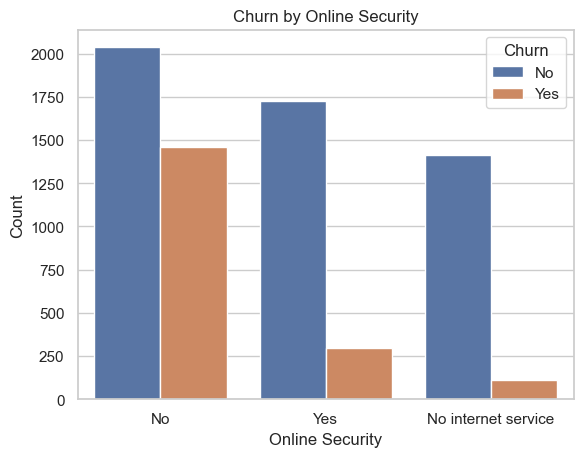

In [21]:
sns.countplot(x='OnlineSecurity', hue='Churn', data=data)
plt.title('Churn by Online Security')
plt.xlabel('Online Security')
plt.ylabel('Count')
plt.show()

### Churn vs Online Security

Customers without online security are significantly more likely to churn than customers who have online security enabled.

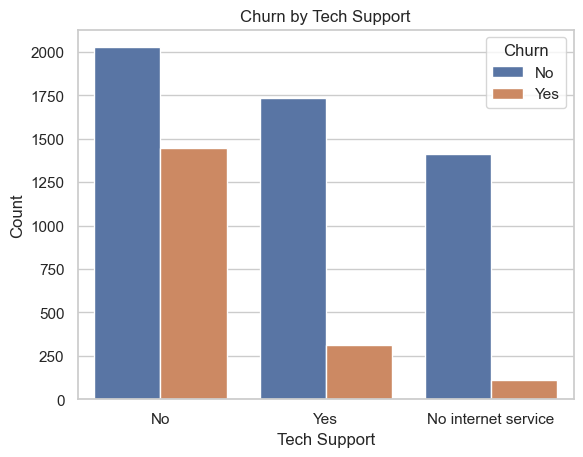

In [22]:
sns.countplot(x='TechSupport', hue='Churn', data=data)
plt.title('Churn by Tech Support')
plt.xlabel('Tech Support')
plt.ylabel('Count')
plt.show()

### Churn vs Tech Support

Customers without tech support show substantially higher churn rates, suggesting that support services play an important role in retention.

In [23]:
(data
    .groupby('TechSupport')['Churn']
    .value_counts(normalize=True)
    .mul(100)
    .round(1)
)

TechSupport          Churn
No                   No       58.4
                     Yes      41.6
No internet service  No       92.6
                     Yes       7.4
Yes                  No       84.8
                     Yes      15.2
Name: proportion, dtype: float64

#### Normalized Churn Rates (Tech Support)

The normalized churn rates confirm that customers without tech support churn at much higher rates than those with tech support.

## Service-Level Churn Summary

- Fiber optic customers exhibit higher churn compared to other internet types.
- Lack of online security is associated with increased churn.
- Customers without tech support churn significantly more than those with support.
- These findings suggest that bundled support and security services can improve customer retention.